# OPTIMAL PATH RESEARCH ON RATP NETWORK WITH DIJKSTRA ALGORITHM

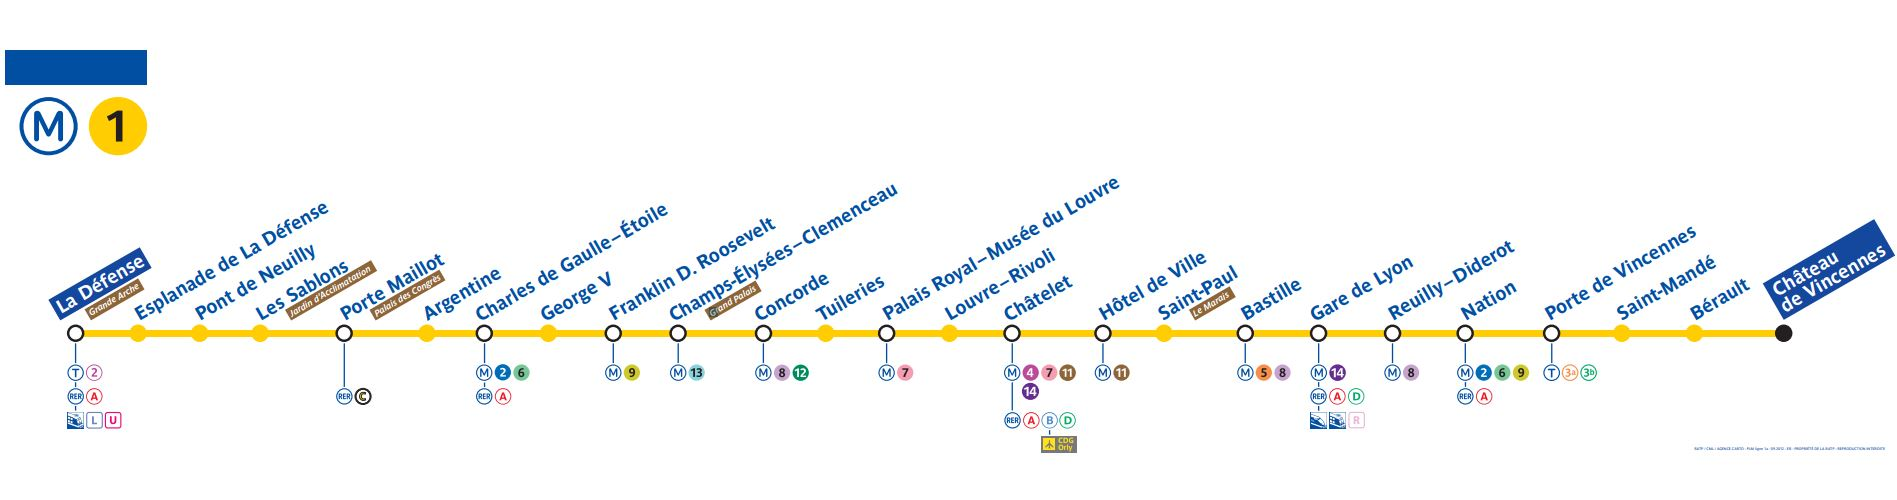

## 1 : Libraries import & global variables definition

### 1.1 : Libraries import

In [4]:
import pandas as pd
import numpy as np
import utils

In [6]:
utils.starting_menu()

-----------------------------------------------------------------------------------------------------------------------------
          _____                    _____                   _____                     _____                   _______         
         /\    \                  /\    \                 /\    \                   /\    \                 /::\    \        
        /::\____\                /::\    \               /::\    \                 /::\    \               /::::\    \       
       /::::|   |               /::::\    \              \:::\    \               /::::\    \             /::::::\    \      
      /:::::|   |              /::::::\    \              \:::\    \             /::::::\    \           /::::::::\    \     
     /::::::|   |             /:::/\:::\    \              \:::\    \           /:::/\:::\    \         /:::/~~\:::\    \    
    /:::/|::|   |            /:::/__\:::\    \              \:::\    \         /:::/__\:::\    \       /:::/    \:::\ 

### 1.2 : Global variables definition

In [7]:
metro_list = ['M1', 'M2', 'M3', 'M3 bis', 'M4', 'M5', 'M6', 'M7', 'M7 bleue', 'M7 jaune', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M13 bleue', 'M13 jaune', 'M14']
rer_list = []
transport_list = metro_list + rer_list

## 2 : RATP Data loading

### 2.1 : Station listing loading

In [9]:
df_station = pd.read_csv('station_listing.csv', sep = ';')
df_station = df_station.loc[df_station['Correspondance_1'].isin(transport_list) | df_station['Correspondance_2'].isin(transport_list) | df_station['Correspondance_3'].isin(transport_list) | df_station['Correspondance_4'].isin(transport_list) | df_station['Correspondance_5'].isin(transport_list)]
df_station = df_station.sort_values('Station')
#df_station.head(5)

### 2.2 : Metro, bus, RER lines listing loading

In [10]:
dict_lines = dict()

for line in metro_list:
    dict_lines[line] = pd.read_csv('./lines_plan/' + line + '.csv', header = None)
    dict_lines[line][0] = dict_lines[line][0].str.upper()

## 3 : Stations connecting network building

In [11]:
neighbors_dict = utils.neighbors_dict_definition(df_station, dict_lines, lines = transport_list)

## 4 : Shortest path finding

### 4.1 : Starting place and arriving place specification

In [12]:
(start_station, end_station) = utils.trip_spec(df_station = df_station)

--------------------------------------------------
		ENTER YOUR TRIP ... 
--------------------------------------------------

FROM : chatelet
TO : gare de lyon


### 4.2 : Optimal path finding

In [13]:
walk = utils.A_to_B(maze_graph = neighbors_dict, node_source = start_station, node_end = end_station)

### 4.3 : Optimal path printing

In [8]:
utils.Path_instruction_printing(neighbors_dict = neighbors_dict, start_station = start_station, end_station = end_station, walk = walk, dict_lines = dict_lines)

--------------------------------------------------------------------------------
	OPTIMAL PATH : CHATELET  -->  GARE DE LYON
--------------------------------------------------------------------------------
START AT CHATELET
TAKE M14 (DIRECTION : OLYMPIADES) AT  CHATELET
STOP AT GARE DE LYON
